                                     Kindly Restart and Run all the cells

### Loading the libraries and dataset

In [1]:
import pandas as pd
import numpy as np

import seaborn as sn
import plotly.express as px
import plotly.offline as pyo
import matplotlib.pyplot as plt

In [2]:
imdb = pd.read_csv('imdb.csv')
imdb.head(5)

id                               name             year  rating  \
0   tt0118708                Beverly Hills Ninja           (1997)     5.5   
1   tt1789846  Monster High: New Ghoul at School  (2010 TV Movie)     6.7   
2  tt12204610      The Killer in the Guest House  (2020 TV Movie)     5.3   
3   tt6708668                         Black Crab           (2022)     5.6   
4   tt0453533                             Unrest       (I) (2006)     5.0   

  certificate duration                     genre   votes gross_income  \
0       PG-13   88 min            Action, Comedy   41511   31,235,710   
1       TV-Y7   23 min        Animation, Fantasy     567       11,000   
2       TV-14   85 min                  Thriller     234      132,863   
3       TV-MA  114 min  Action, Adventure, Drama  18,616   31,153,464   
4           R   88 min          Horror, Thriller   8,066      215,300   

          directors_id            directors_name  \
0            nm0240797              Dennis Dugan   
1  nm0655637,nm0705779  Audu Paden,Eric Radomski   
2            nm1046827           Tony Dean Smith   
3            nm3515833                 Adam Berg   
4            nm1118463          Jason Todd Ipson   

                                  stars_id  \
0  nm0000394,nm0001733,nm0795225,nm0662511   
1  nm1512156,nm1086483,nm0220635,nm1154161   
2  nm0387581,nm4785386,nm2254636,nm5512848   
3  nm0636426,nm1939580,nm1502469,nm4558335   
4  nm0257598,nm1404049,nm1130845,nm0662475   

                                          stars_name  \
0  Chris Farley,Nicollette Sheridan,Robin Shou,Na...   
1  Kate Higgins,Salli Saffioti,Debi Derryberry,La...   
2  Chelsea Hobbs,Marcus Rosner,Matthew Kevin Ande...   
3     Noomi Rapace,Jakob Oftebro,Dar Salim,Erik Enge   
4  Corri English,Scot Davis,Joshua Alba,Marisa Pe...   

                                         description  
0  A man tries to rescue a woman with a little he...  
1  Frankie Stein begins at Monster High and follo...  
2  A struggling fashion photographer unknowingly ...  
3  In a post-apocalyptic world, six soldiers on a...  
4  A young pathology med student suspects that th...

In [3]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20789 entries, 0 to 20788
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20789 non-null  object 
 1   name            20789 non-null  object 
 2   year            20789 non-null  object 
 3   rating          20789 non-null  float64
 4   certificate     20789 non-null  object 
 5   duration        20789 non-null  object 
 6   genre           20789 non-null  object 
 7   votes           20789 non-null  object 
 8   gross_income    20789 non-null  object 
 9   directors_id    20789 non-null  object 
 10  directors_name  20789 non-null  object 
 11  stars_id        20789 non-null  object 
 12  stars_name      20789 non-null  object 
 13  description     20789 non-null  object 
dtypes: float64(1), object(13)
memory usage: 2.2+ MB


### Data Cleaning

In [4]:
imdb.isnull().sum()

id                0
name              0
year              0
rating            0
certificate       0
duration          0
genre             0
votes             0
gross_income      0
directors_id      0
directors_name    0
stars_id          0
stars_name        0
description       0
dtype: int64

### 1. How many different Genre of Movies are there in this dataset?

A. Unique Genre's Pairs Count

In [5]:
imdb['genre'].nunique()

919

B. Unique Genre's Count

In [6]:
Genre = set()                     # Set to store unique elements only

# Store unique genre to Genre set()
for gre in imdb['genre']:
    l = gre.replace(',','').split()
    for item in l:
        Genre.add(item)
len(Genre)

26

* There are `919` unique Genre's Pairs,
* There are **`26 unique Genre`** in the datasets.

### 2. Find the most voted Movie in the dataset
Convert Vote data type from object to Integer

In [7]:
vote = []

for value in imdb['votes']:
    vote.append(int(value.replace(',','')))      # Replace comma with empty space and change data type to integer

imdb['votes'] = vote
imdb['votes'].dtype

dtype('int64')

##### Approach :1

In [8]:
imdb.sort_values(['votes'],ascending=False)[['name','votes']][:3]

name    votes
11722  The Dark Knight  2574832
7374         Inception  2284273
20215     Pulp Fiction  1995361

##### Approach :2

In [9]:
Max = imdb['votes'].max()
imdb[imdb['votes'] == Max][['name']]

name
11722  The Dark Knight

The highest voted movies in dataset is **`The Dark Knight`**

### 3. Which Genre is having most number of Movies in the dataset?

A. Movies Count w.r.t unique Genre's Pairs
##### Approach : 1

In [10]:
imdb.groupby('genre', as_index=False).count().sort_values(by = 'name',ascending=False)[['genre','name']].head(3)

genre  name
43     Action, Crime, Drama   741
456  Crime, Drama, Thriller   527
441            Crime, Drama   466

##### Approach :2

In [11]:
imdb.groupby('genre').size().sort_values(ascending=False).reset_index(name='Movies_counts').head(3)

genre  Movies_counts
0    Action, Crime, Drama            741
1  Crime, Drama, Thriller            527
2            Crime, Drama            466

B. Movies Count w.r.t unique Genre

In [12]:
# Create a dictionary with unique Genre key and 0  as values
GENRE ={}
for gr in Genre:
    GENRE[gr] = 0

# Add the count to values of respective GENRE key
for gre in imdb['genre']:
    l = gre.replace(',',' ').split()
    for gr in l:
        GENRE[gr] +=1

# Create Dataframe from GENRE dictionary key and values
Genres = pd.DataFrame(list(zip(GENRE.keys(), GENRE.values())),columns =['Genre', 'Movies_Counts'])

In [13]:
Genres.sort_values('Movies_Counts', ascending=False).head()

Genre  Movies_Counts
12     Drama           9928
14    Action           5508
0      Crime           5444
15    Comedy           4901
24  Thriller           4299

##### For unique Genre's Pairs
 * The most number of movies in `Action, Crime, Drama` Genre's pairs i.e 741.

##### For unique Genre
 * **`Drama` has highest movies counts of `9928`**.

### 4. Find the Disctribution of number of movies in each genre with bar graph
A. Movies counts with respect to unique Genre's pairs

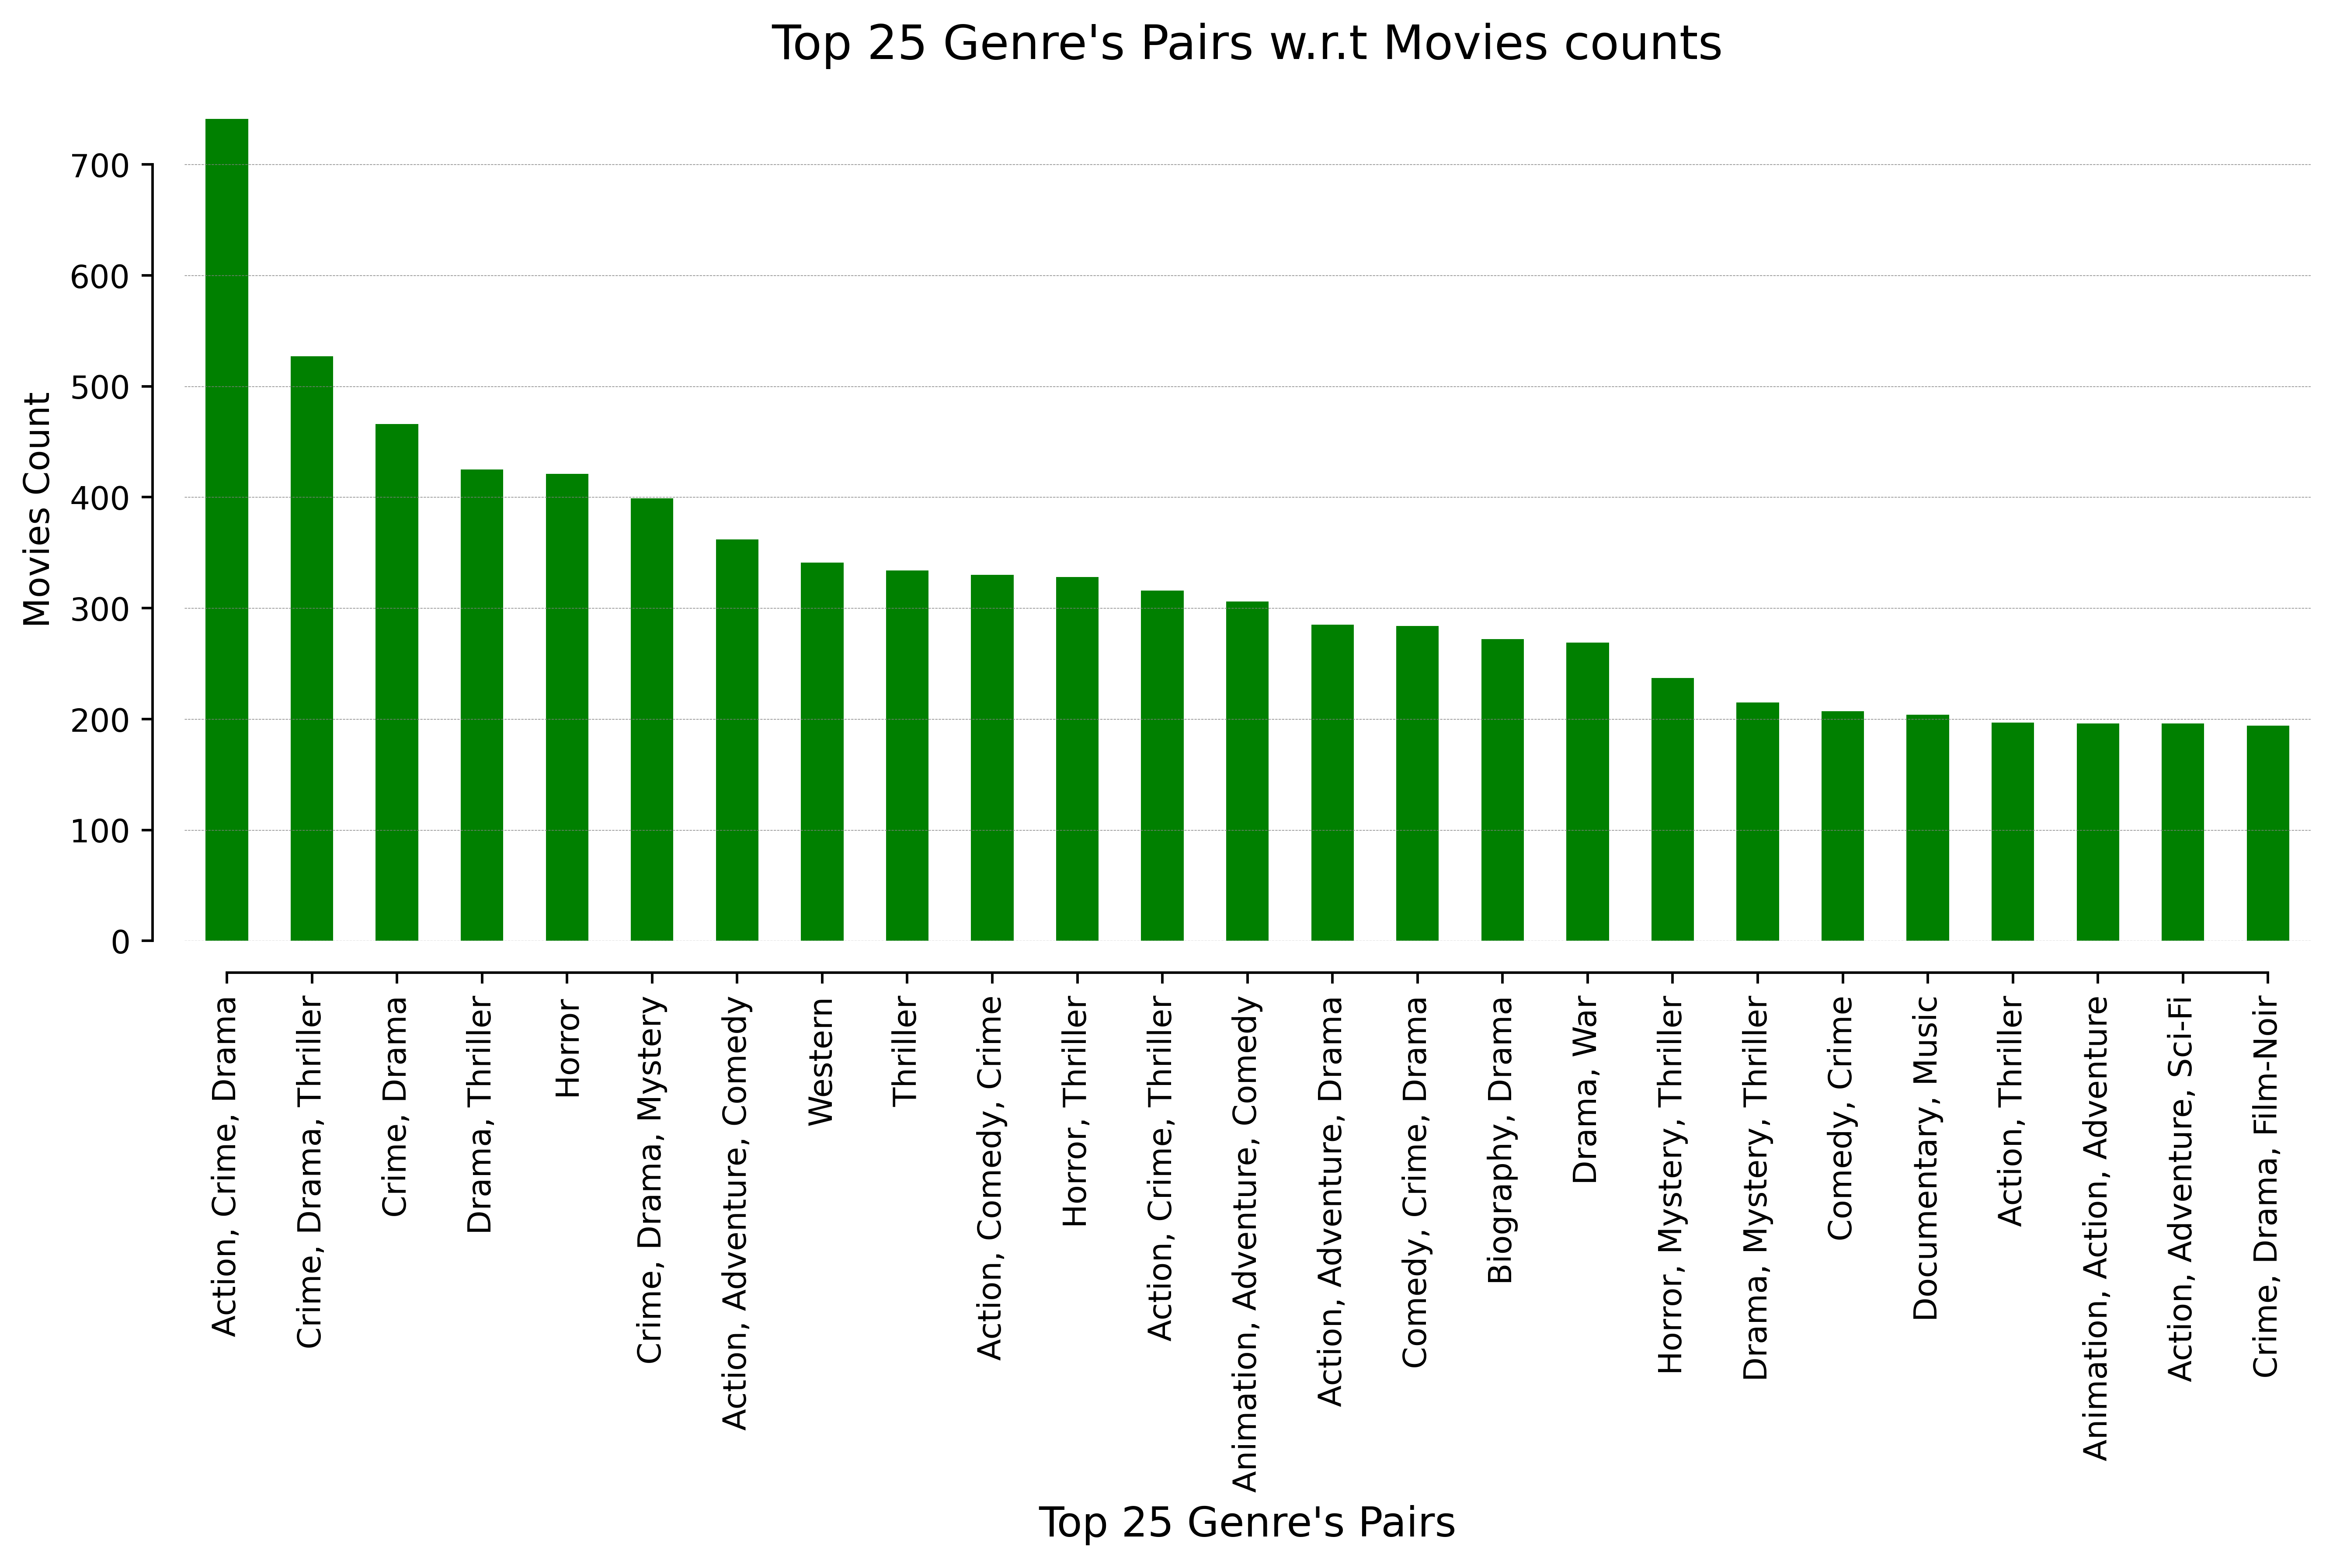

In [14]:
# Adjust the size and view of plot
plt.figure(figsize=(12,5), dpi=523)                                   

# Quick bar plot with pandas
imdb.genre.value_counts()[:25].plot(kind='bar', color = 'g')          

# Set horizontal grid lines
plt.grid(True, axis = 'y',                                            
         color = 'gray', 
         linestyle = '--',  
         linewidth=0.2) 
# Remove vertical grid lines
plt.grid(False, axis = 'x')      

# Remove boundry line, set Offset & trim the corner
sn.despine(offset=10, trim= True)  

# Rotate the x tick value by 90 degree
plt.xticks(rotation = 90)                                             

plt.xlabel("Top 25 Genre's Pairs", fontsize = 13)                           # Set X label         
plt.ylabel("Movies Count", fontsize = 11)                                   # Set Y label
plt.title("Top 25 Genre's Pairs w.r.t Movies counts", fontsize = 15)        # Set title
plt.show()

In [15]:
fig =px.bar(imdb[['genre']].value_counts().reset_index(name='Movies Counts')[:25],
            x= 'genre',
            y= 'Movies Counts',
            labels= {'genre':"Genre's Pairs"},
            template='plotly_dark',
            title="<b> Top 25 Genre's Pairs w.r.t Movies counts")

fig.show()

pyo.plot(fig, filename = "Plotly/Top 25 Genre's Pairs w.r.t Movies counts.html", auto_open = True)

"Plotly/Top 25 Genre's Pairs w.r.t Movies counts.html"

B. Movies Counts for unique Genre

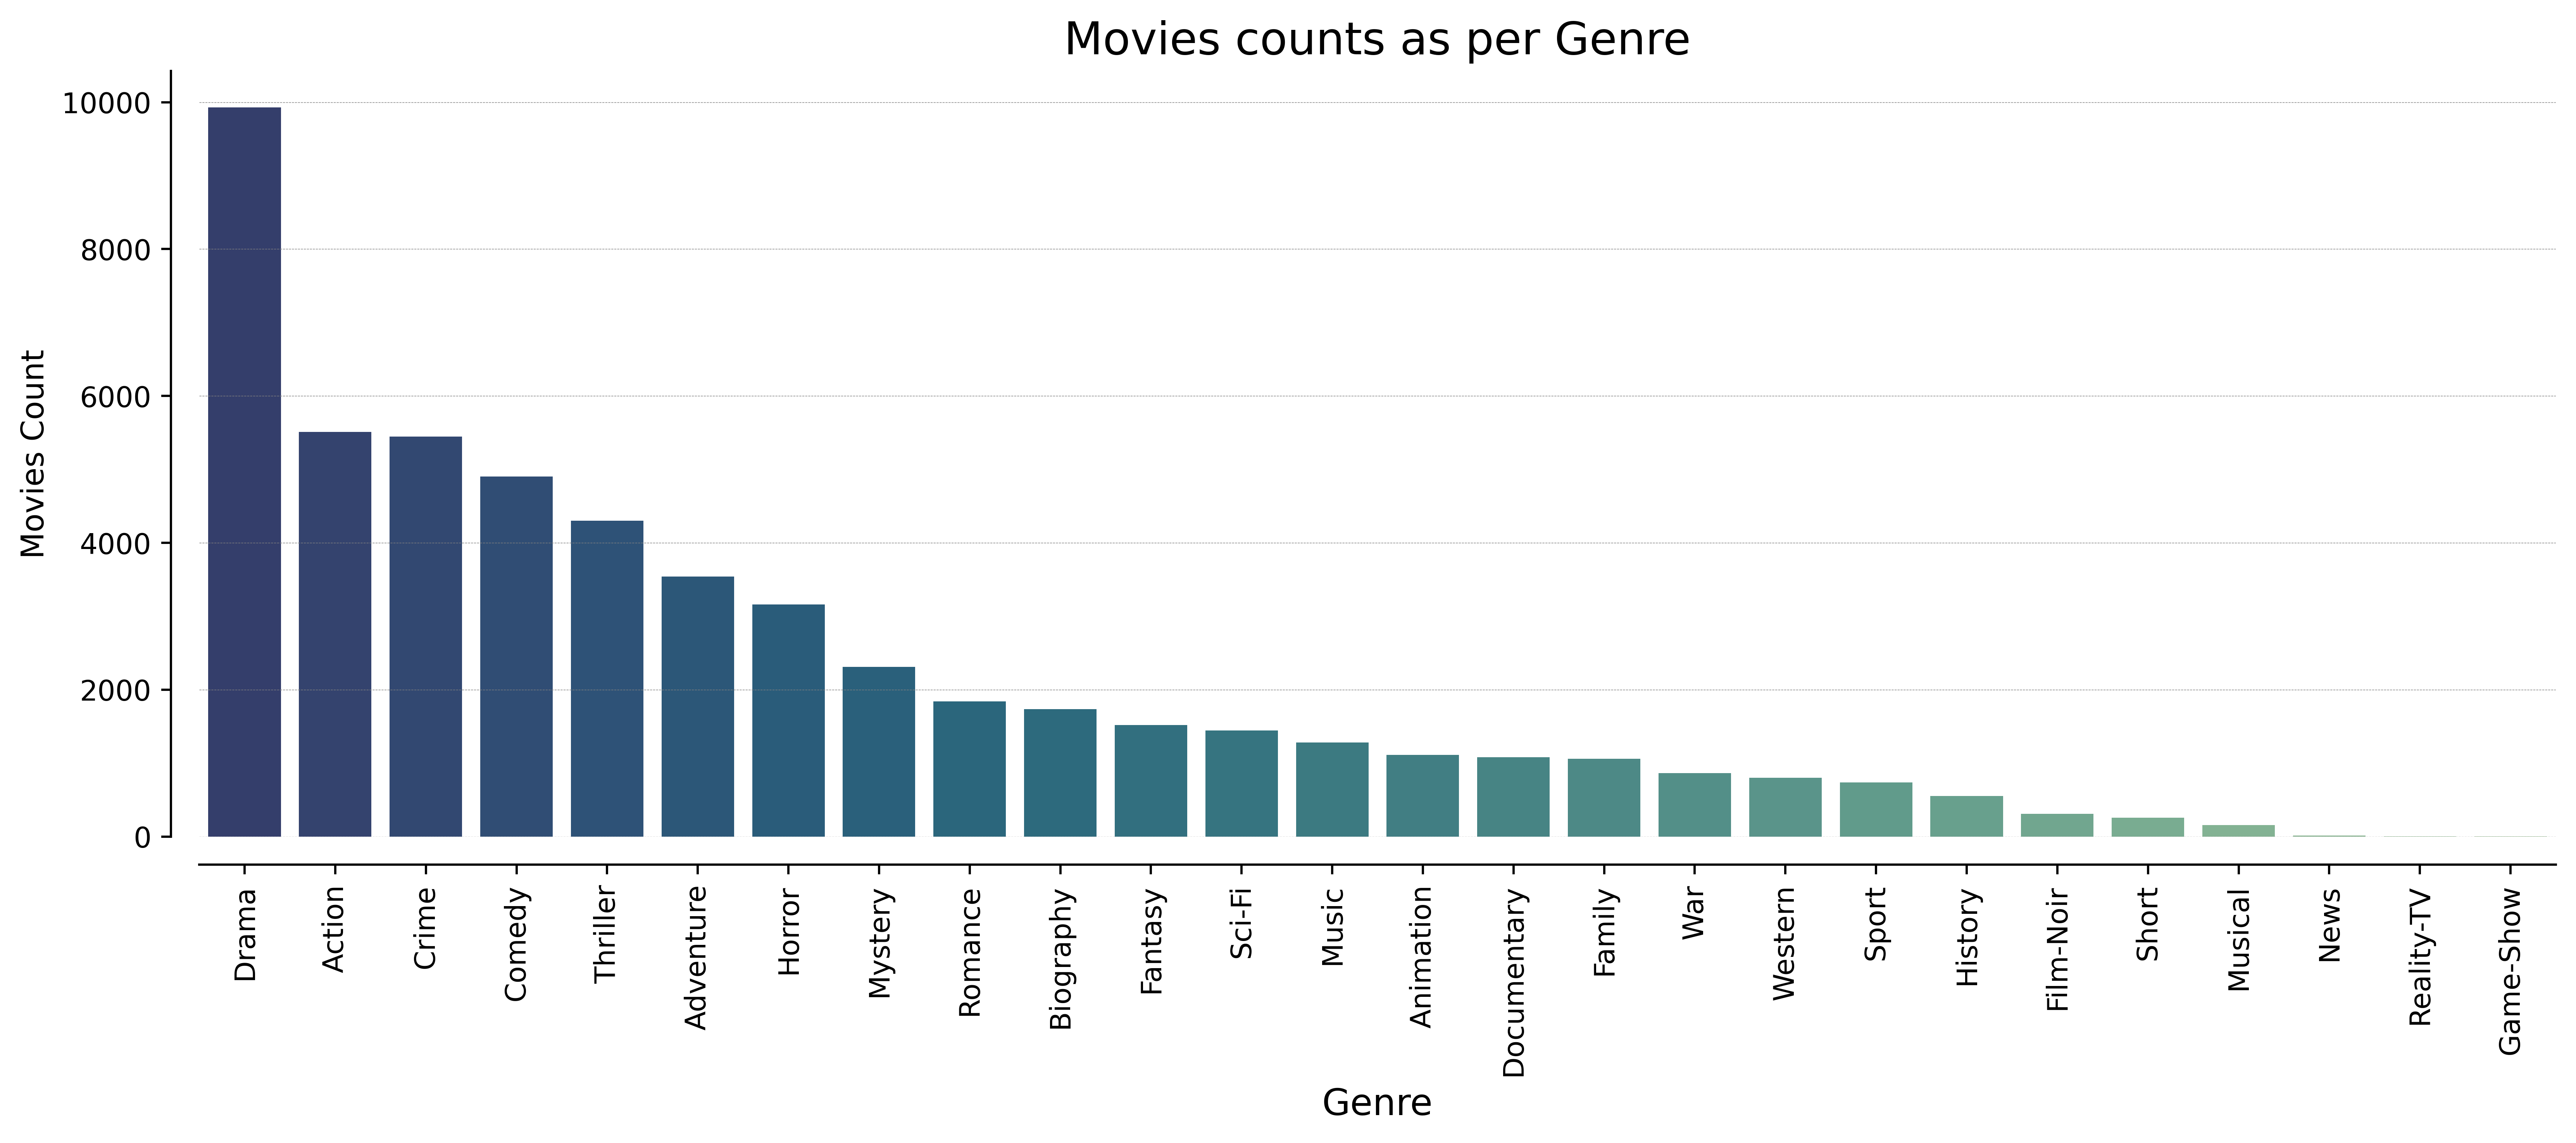

In [16]:
# Adjust the size and view of plot
plt.figure(figsize=(15,5), dpi=523)                                       
#sn.set_style('whitegrid') 

# Seaborn Bar plot
sn.barplot(data = Genres.sort_values('Movies_Counts', ascending=False),   
           x='Genre',
           y = 'Movies_Counts',
           palette= "crest_r"#'plasma'
          )     


# Set horizontal grid lines
plt.grid(True, axis = 'y',                                                 
         color = 'gray', 
         linestyle = '--',  
         linewidth=0.2
        ) 
# Remove vertical grid lines
plt.grid(False, axis = 'x')                                   

# Remove boundry line, set Offset & trim the corner
sn.despine(offset=10, trim=False)

# Rotate the x tick value by 90 degree for better view
plt.xticks(rotation = 90)                                     

plt.xlabel("Genre", fontsize = 13)                             # Set X label         
plt.ylabel("Movies Count", fontsize = 11)                      # Set Y label
plt.title('Movies counts as per Genre', fontsize = 16)         # Set title
plt.show()

In [17]:
fig =px.bar(Genres.sort_values('Movies_Counts', ascending=False),
            x= 'Genre',
            y= 'Movies_Counts',
            template='plotly_dark',
            color_discrete_sequence = px.colors.qualitative.Dark2,
            title='<b>Movies counts as per Genre')

fig.show()

pyo.plot(fig, filename = "Plotly/Movies counts as per Genre.html", auto_open = True)

'Plotly/Movies counts as per Genre.html'

### 5. Plot top 10 Movies with maximum Gross-Income with Bar Graph

###### Convert "gross_income" data type from object to Integer

In [18]:
gross = []
for income in imdb['gross_income']:
    income = income.replace(',','')                  # Replace comma with whitespace
    try:
        gross.append(int(income))                    # Convert to int and add to the list
    except:
        income = income.replace('$','')              # Replace $ symbol with empty space
        income = income.replace('M','')              # Replace M (i.e Million) with empty space
        inc = float(income)*(10**6)                  # Convert to float and Multiply by 1Million(10**6)
        gross.append(int(inc))                       # Convert to integer and append in the existing list

imdb['gross_income'] = gross       # Repllace the existing gross_income column with newly gross list in existing dataframe
imdb['gross_income'].dtypes        # Check the data type of gross_income column

dtype('int64')

In [19]:
df = imdb.sort_values('gross_income')[['name','gross_income']].sort_values(by = 'gross_income',ascending=False)[:10]

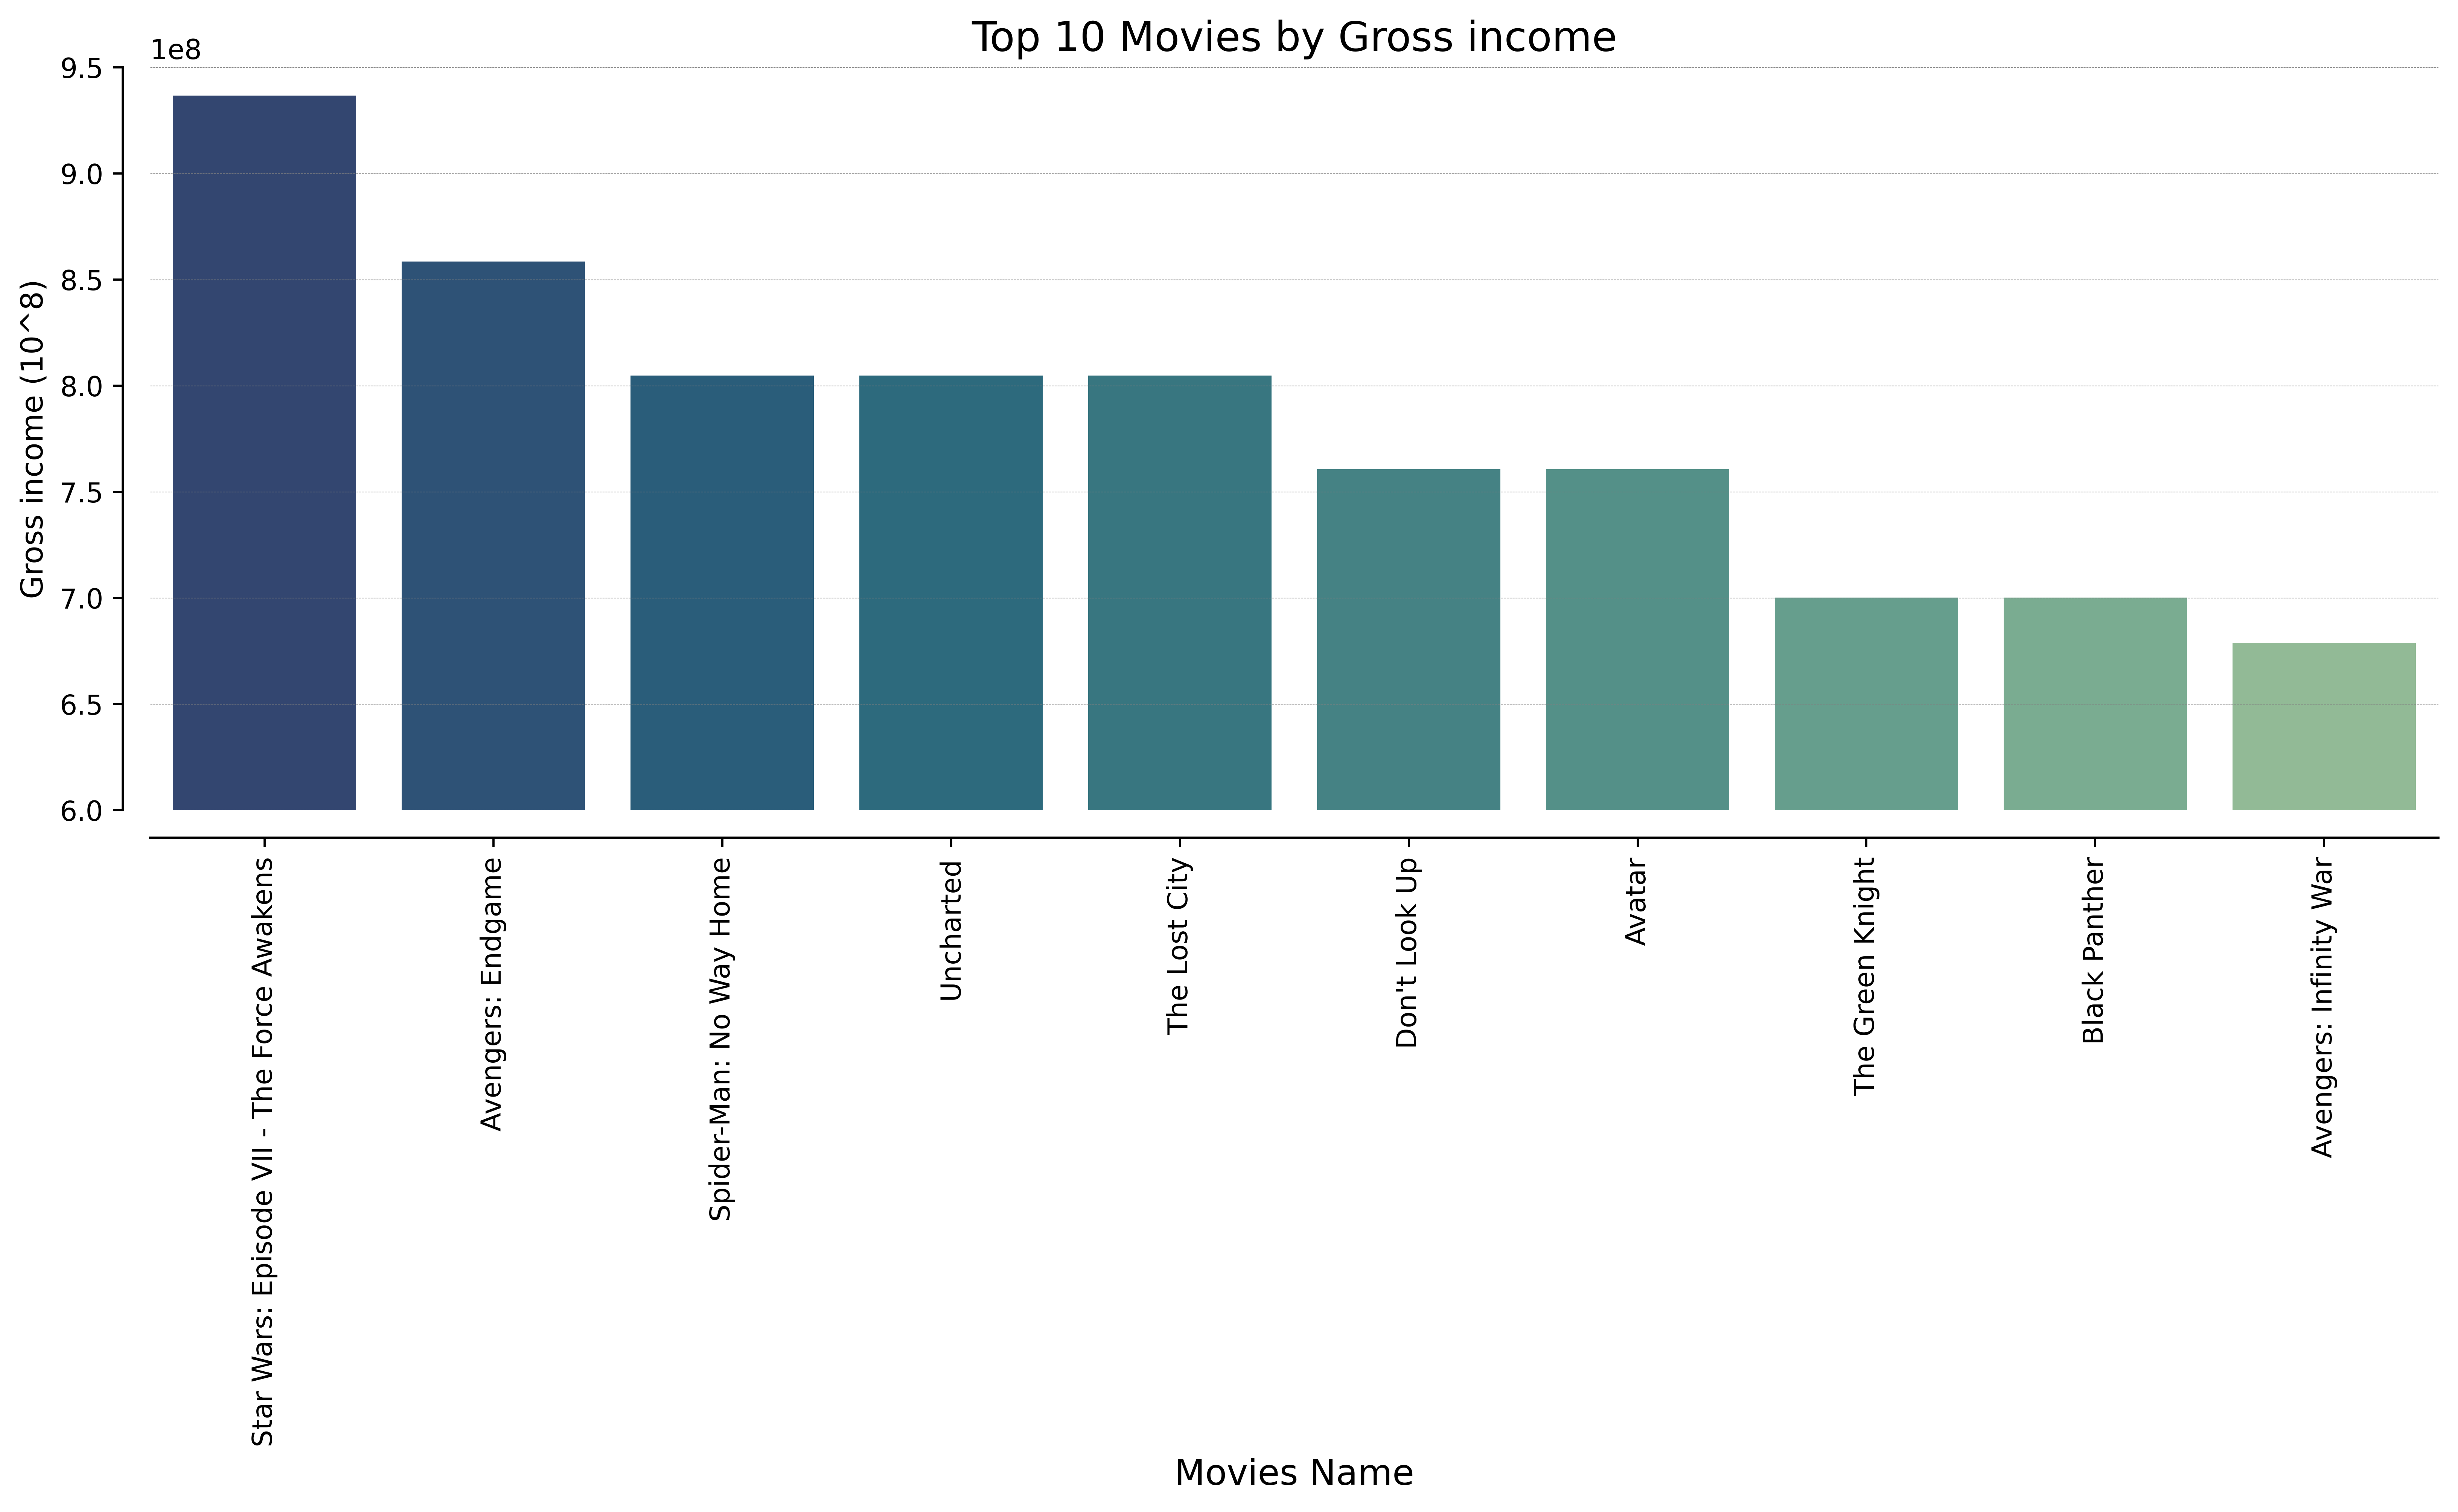

In [20]:
# Adjust the size and view of plot
plt.figure(figsize=(15,5), dpi=523)                                       
#sn.set_style('whitegrid') 

# Set Y limit value 
plt.ylim(600000000, 950000000)                               

# Seaborn Bar plot
sn.barplot(x=df.name.values,           
           y=df.gross_income.values,
           data=df,
           #color = 'green',
           palette= "crest_r"
          )  


# Set horizontal grid lines
plt.grid(True, axis = 'y',                                                 
         color = 'gray', 
         linestyle = '--',  
         linewidth=0.2
        ) 
# Remove vertical grid lines
plt.grid(False, axis = 'x')                                   

# Remove boundry line, set Offset & trim the corner
sn.despine(offset=10, trim=False)

# Rotate the x tick value by 90 degree for better view
plt.xticks(rotation = 90)                                     

plt.xlabel("Movies Name", fontsize = 13)                             # Set X label         
plt.ylabel("Gross income (10^8)", fontsize = 11)                     # Set Y label
plt.title('Top 10 Movies by Gross income', fontsize = 15)            # Set title
plt.show()

In [21]:
df = imdb.sort_values('gross_income')[['name','gross_income']].sort_values(by = 'gross_income',ascending=False)[:10]

fig =px.bar(df,
            x       = 'name',
            y       = 'gross_income',
            color   = 'name',
            labels  = {'name': 'Movies Name'},
            color_discrete_sequence = px.colors.qualitative.Dark2,
            template='plotly_dark',
            title   ='<b> Top 10 Movies by Gross-income'
           )

fig.show()
pyo.plot(fig, filename = "Plotly/Top 10 Movies by Gross-income.html", auto_open = True)

'Plotly/Top 10 Movies by Gross-income.html'

### 6. Whats the average duration of a movie in each genre in ascending order?

**Remove 'Min' from `imdb['duration']`and convert the data type to integer**

In [22]:
time = []
for t in imdb['duration']:
    T = t.replace(',','').split()           # Replace comma with whitespaces and split     
    try :
        time.append(int(T[0]))              # Add the integer value to the list
    except:
        print(t)

imdb['duration'] = time                     # Replace the existing duration with newly created list
imdb['duration'].dtypes                     # Check the data type

dtype('int64')

A. For Unique Genre's Pairs

In [23]:
df = imdb.groupby('genre', as_index=False)[['duration']].mean().sort_values(by = 'duration',ascending=True)
df.head(5)

genre  duration
600  Documentary, Short, Action       1.0
869      Short, Comedy, Fantasy       3.0
298     Animation, Short, Music       3.0
864    Short, Biography, Comedy       3.0
857      Short, Action, Fantasy       3.0

B. For single Genre

In [24]:
Duration ={}

# Create a Dictionary with empty list
for gr in Genre:                                         
    Duration[gr] = []

# Add movies duration time for each Genre respectively     
for i in range(imdb.shape[0]):                             
    l = imdb.genre.iloc[i].replace(',',' ').split()           # Replace comma and split
    for gr in l:
        Duration[gr].append(imdb.duration[i])                # Add all the movie duration for the respective Genre


# Replace the existing Duration list with the mean Duration time
for key in Duration.keys():                             
    Duration[key] = sum(Duration[key])/len(Duration[key])

# Canvert the Dictionary to DataFrame
DURATION = pd.DataFrame(list(zip(Duration.keys(), Duration.values())),columns =['Genre', 'Durations'])

# Add DURATION to the existing Genres DataFrame as Avg_Duration
Genres['Avg_Duration'] = DURATION['Durations']

In [25]:
Genres.sort_values('Avg_Duration', ascending=True)[['Genre','Avg_Duration']]

Genre  Avg_Duration
1         Short     16.871595
9     Animation     78.081154
3          News     78.083333
8     Game-Show     85.000000
25    Film-Noir     88.260586
13       Horror     93.198355
11       Family     93.464522
4       Western     96.052500
15       Comedy     96.276678
22   Reality-TV     98.666667
7        Sci-Fi     98.919723
19      Fantasy     99.555921
16    Adventure    100.718882
24     Thriller    100.723889
5       Mystery    100.821799
18  Documentary    100.858595
23        Music    102.326308
0         Crime    102.869214
6         Sport    103.804613
2       Romance    105.266848
14       Action    105.594590
12        Drama    106.126511
20          War    107.430716
10    Biography    109.628390
21      Musical    110.493590
17      History    116.873188

In [26]:
fig =px.bar(Genres.sort_values('Avg_Duration', ascending=True)[['Genre','Avg_Duration']],
            x= 'Genre',
            y= 'Avg_Duration', 
            labels={'Genre':'Genre'},
            color = 'Genre',
            color_discrete_sequence = px.colors.sequential.Viridis,
            template='plotly_dark',
            title='<b> Average Movies duration (in Minutes) w.r.t. Genre')

fig.show()
pyo.plot(fig, filename = "Plotly/Average Movies duration (in Minutes) w.r.t. Genre.html", auto_open = True)

'Plotly/Average Movies duration (in Minutes) w.r.t. Genre.html'

#### With respect to Unique Genre's Pairs
  * The average time duration of a movie is `minimum` in **`Documentary, Short, Action`** Genres Pairs of mean `1` Minute only.
  * The maximum in **`Action, Family, Horror`** Genres Pairs of `265` Minutes.
  
#### With respect to Unique Genre
  * The average time duration of a movie is `minimum` in **`Short`** Genre of mean `16.8716` Minute only.
  * The maximum in **`History`** Genre of `116.8732` Minutes.

### 7. Which Genre is the best to make a movie to get maximum gross income?

A. For unique Genre's Pairs

In [27]:
df = imdb.groupby(['genre'], as_index=False)[['gross_income']].mean().sort_values(by = 'gross_income',ascending=False)
df.head()

genre  gross_income
809        Music, Romance, Sci-Fi  2.097260e+08
14      Action, Adventure, Sci-Fi  1.164601e+08
76          Action, Family, Sport  1.151040e+08
236  Animation, Adventure, Comedy  8.432863e+07
270         Animation, Drama, War  8.405276e+07

B. For Single Genre

In [28]:
Income ={}

# Create a Dictionary with empty list
for gr in Genre:                                         
    Income[gr] = []

# Add movies Gross Income for each Genre respectively in a list    
for i in range(imdb.shape[0]):                             
    l = imdb.genre.iloc[i].replace(',',' ').split()    # Replace the comma and split
    for gr in l:
        Income[gr].append(imdb.gross_income[i])        # Add all the gross_income for their respectly unique Genre


# Replace with existing Gross Income list with the mean of Gross Income
for key in Income.keys():                             
    Income[key] = sum(Income[key])/len(Income[key])

# Canvert the Dictionary to DataFrame
Incomes = pd.DataFrame(list(zip(Income.keys(), Income.values())),columns =['Genre', 'Avg_gross_income'])

# Add Gross Income to the existing Genres DataFrame
Genres['Avg_gross_income'] = Incomes['Avg_gross_income']

In [29]:
Genres.sort_values(['Avg_gross_income'],ascending=False).head(3)

Genre  Movies_Counts  Avg_Duration  Avg_gross_income
16  Adventure           3543    100.718882      3.818729e+07
9   Animation           1109     78.081154      3.551142e+07
7      Sci-Fi           1445     98.919723      3.128869e+07

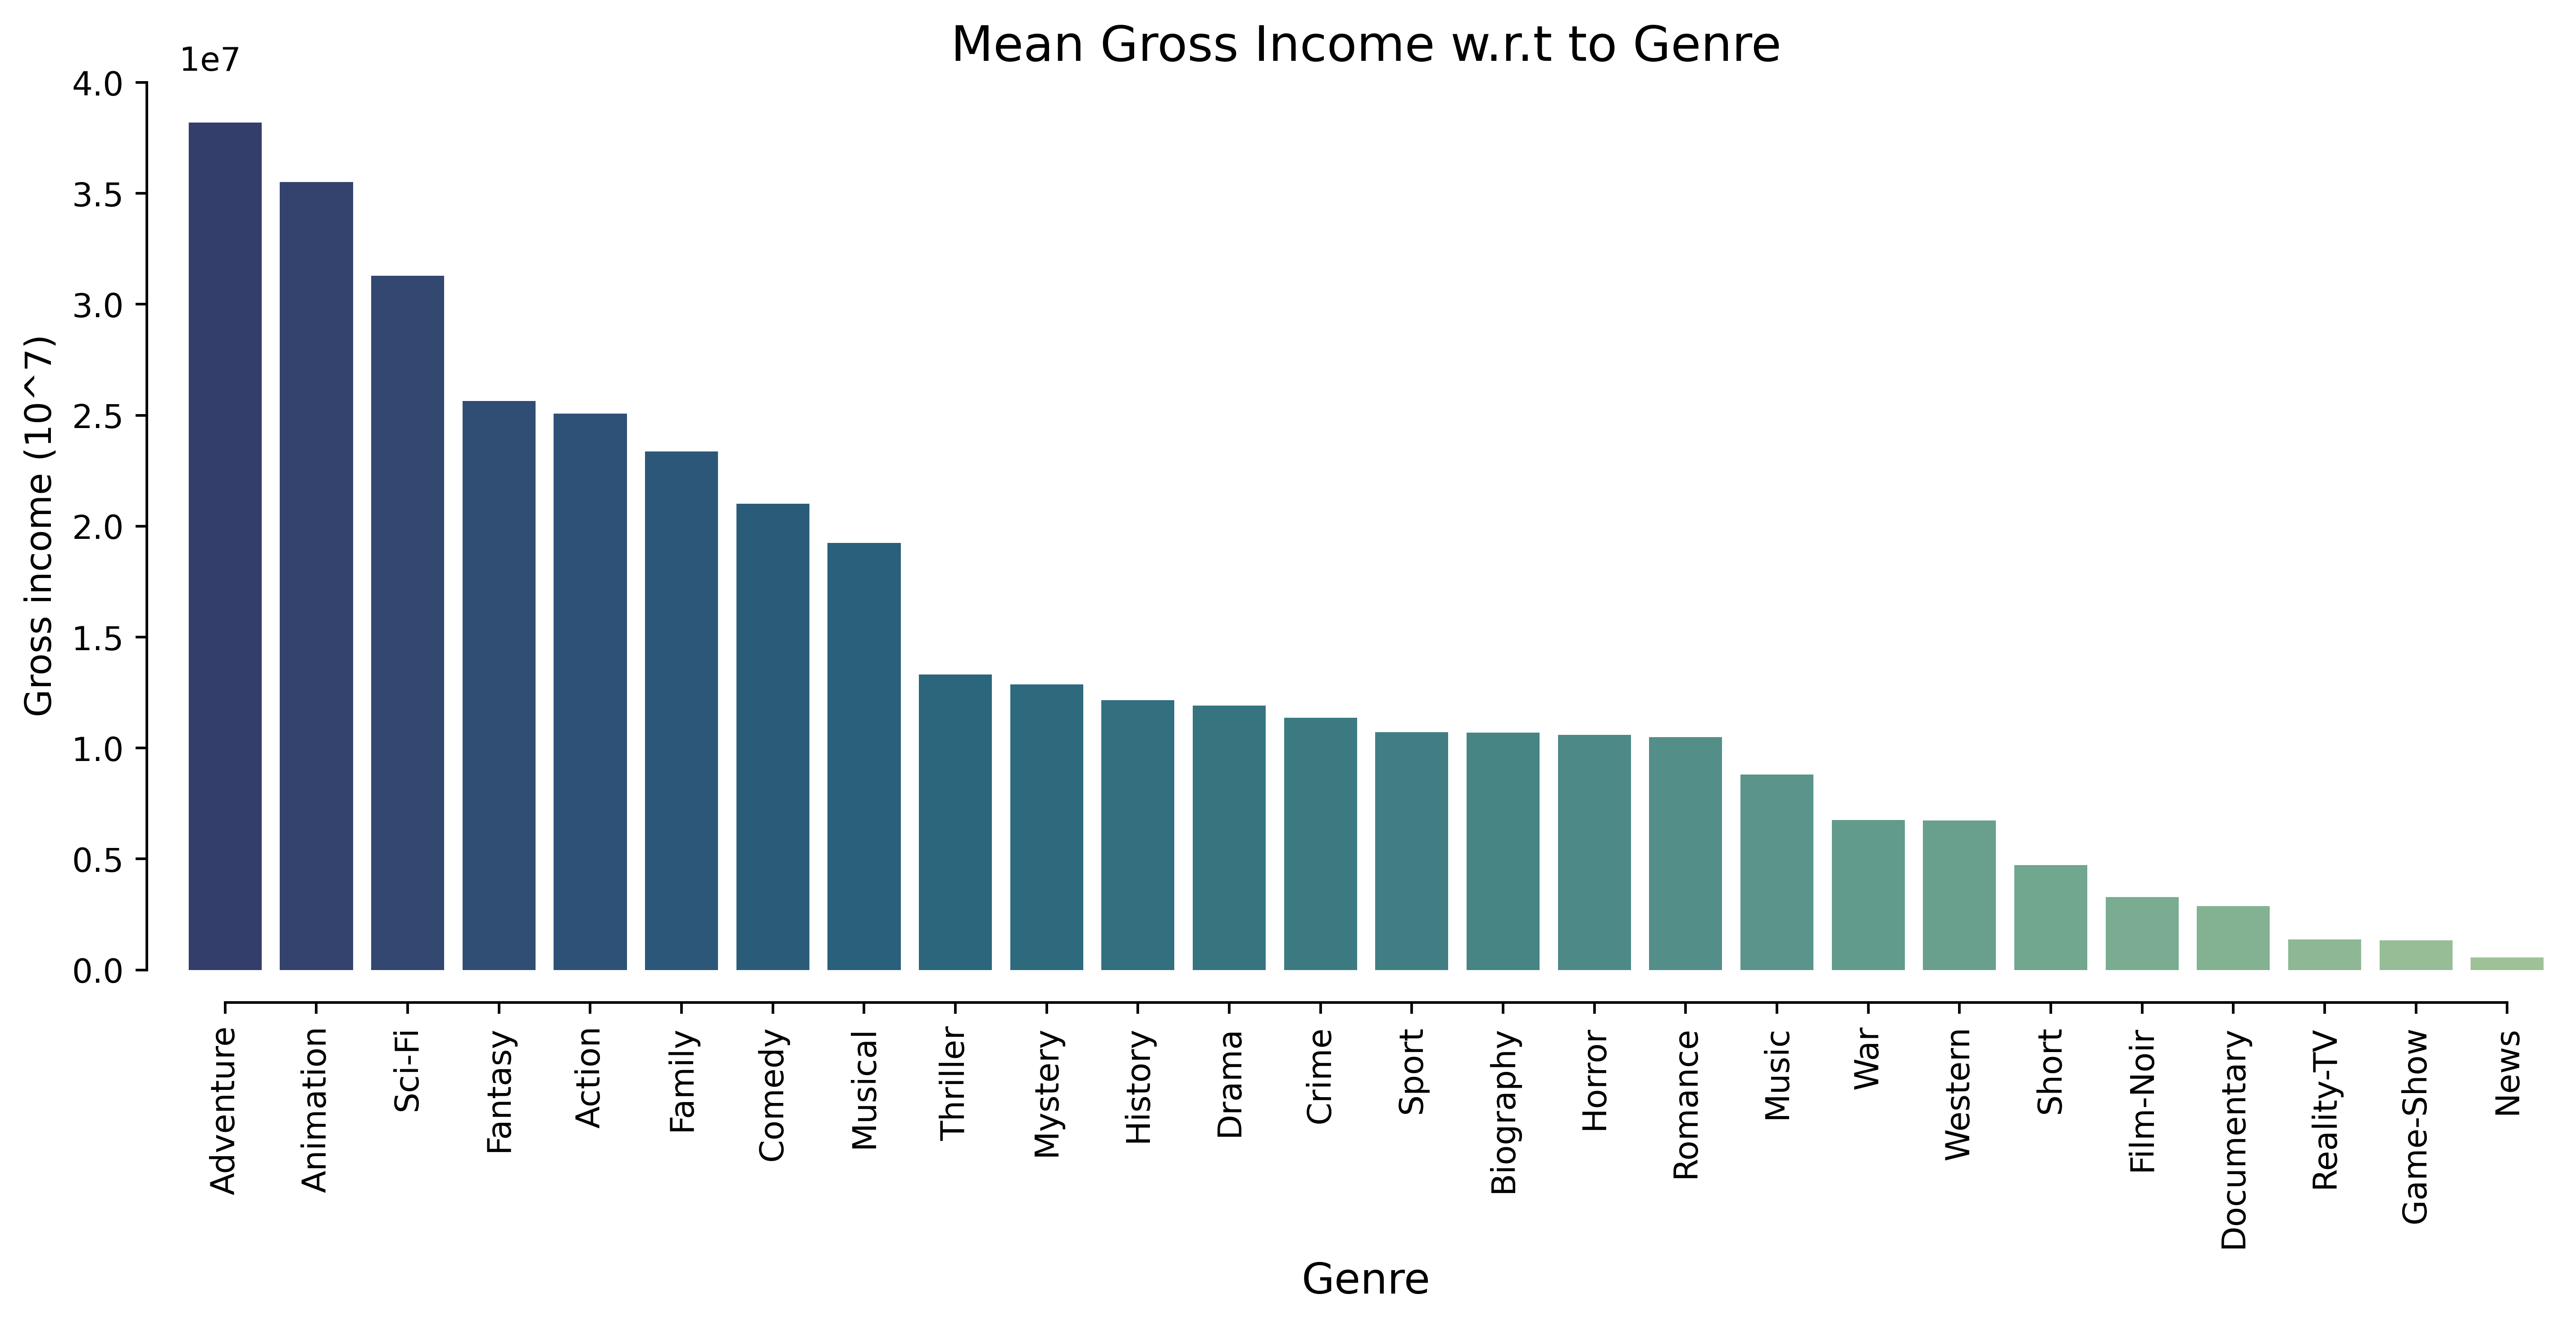

In [30]:
# Adjust the figure size and view
plt.figure(figsize=(13,5),dpi=523)                           

# Seaborn Bar plot
sn.barplot(x='Genre',                                        
           y='Avg_gross_income',
           data=Genres,
           order = Genres.sort_values(['Avg_gross_income'],ascending=False)['Genre'].values,
           #color = 'green',
           palette= "crest_r"
          )

# Remove boundry line,set offset at corner & trim the corner
sn.despine(offset=10, trim= True)                              

# Rotate the x tick value by 90 degree for better view
plt.xticks(rotation = 90)              

plt.xlabel("Genre", fontsize = 13)                                    # Set X label         
plt.ylabel("Gross income (10^7)", fontsize = 11)                      # Set Y label
plt.title('Mean Gross Income w.r.t to Genre', fontsize = 15)          # Set title
plt.show()

In [31]:
Genres[Genres['Avg_gross_income']==Genres['Avg_gross_income'].max()]

Genre  Movies_Counts  Avg_Duration  Avg_gross_income
16  Adventure           3543    100.718882      3.818729e+07

#### With respect to unique Genre's Pairs :
 * `Music, Romance, Sci-Fi` is the best genre pairs to make highest Gross income.
 
#### With respect to unique Genre :
 * **`Adventue` is the best genre to make highest gross income.**

### 8. Which Genre is the worst to make money from a movie?

A. For unique Genre's Pairs

In [32]:
df = imdb.groupby(['genre'], as_index=False)[['gross_income']].mean().sort_values(by = 'gross_income',ascending=False)
df.tail()

genre  gross_income
257  Animation, Comedy, Sci-Fi        1469.0
796  Horror, Thriller, Fantasy        1027.0
860           Short, Adventure         866.0
85     Action, History, Horror         438.0
732   Family, Mystery, Fantasy         181.0

B. For unique Genre

In [33]:
fig =px.bar(Genres.sort_values(['Avg_gross_income'],ascending = True),
            x= 'Genre',
            y= 'Avg_gross_income', 
            labels={'Genre':'Genre'},
            color  = 'Genre',
            color_discrete_sequence = px.colors.sequential.Cividis_r,
            template='plotly_dark',
            title='<b> Average Gross Income w.r.t. to Genre')

fig.show()
pyo.plot(fig, filename = "Plotly/Average Gross Income w.r.t. to Genre.html", auto_open = True)

'Plotly/Average Gross Income w.r.t. to Genre.html'

In [34]:
Genres[Genres['Avg_gross_income']==Genres['Avg_gross_income'].min()]

Genre  Movies_Counts  Avg_Duration  Avg_gross_income
3  News             12     78.083333         561811.75

#### With respect to unique Genre's Pairs :
 * `Family, Mystery, Fantasy` is the worst genre pairs with respect to average gross income.
 
#### With respect to unique Genre :
 * **`News` is the worst genre with respect to average gross income.**

### 9. Distribution of Average Gross Income of each genre?

A. unique Genre's Pairs

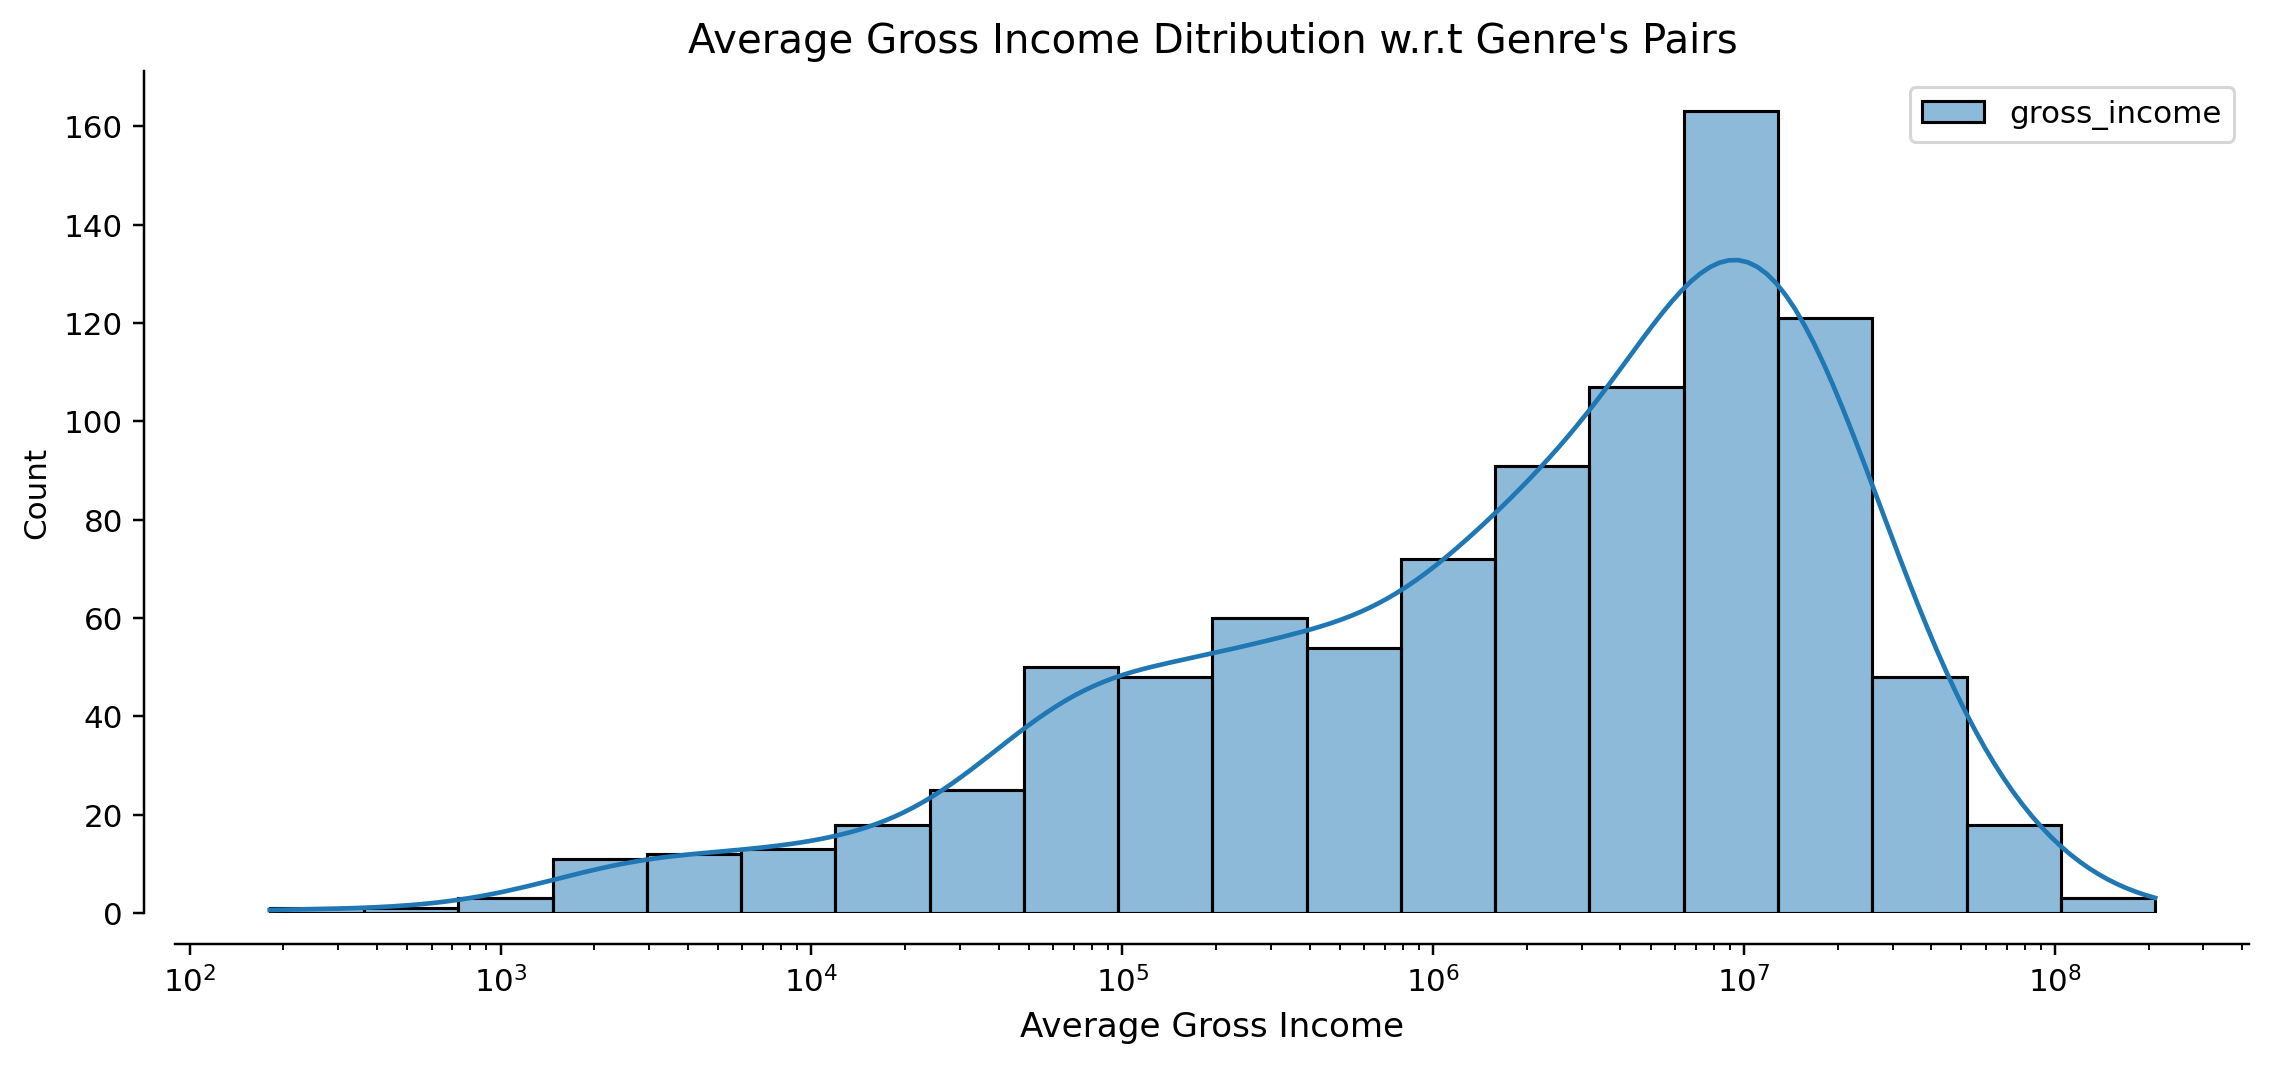

In [35]:
# Adjust the figure size and view
plt.figure(figsize=(12,5), dpi=223)

#  Average Gross Income distribution plot
sn.histplot(data = imdb.groupby('genre')[['gross_income']].mean(),
            #bins = 26,
            stat = 'count',                                 
            kde = True,
            log_scale=10,
           )

# Remove boundry line,set offset at corner & trim the corner
sn.despine(offset=10, trim= False)                            

plt.xlabel("Average Gross Income", fontsize = 11)                                  # Set X label         
plt.title("Average Gross Income Ditribution w.r.t Genre's Pairs", fontsize = 13)   # Set title
plt.show()

In [36]:
fig =px.scatter(imdb,
                x= 'name',
                y= 'gross_income',
                labels={'name':'Movies'},
                size='gross_income',
                size_max= 35,
                color = 'genre',
                color_discrete_sequence = px.colors.sequential.Plasma,
                opacity=0.8,
                template='plotly_dark',
                title="<b> Average Gross Income Ditribution w.r.t Genre's Pairs")

fig.update_layout(autosize=True,
                  height=800,
                  xaxis=dict(showgrid=False),
                  yaxis=dict(showgrid=False)
                 )

fig.show()
pyo.plot(fig, filename = "Plotly/Average Gross Income Ditribution w.r.t Genre's Pairs.html", auto_open = True)

"Plotly/Average Gross Income Ditribution w.r.t Genre's Pairs.html"

#### For unique Genre

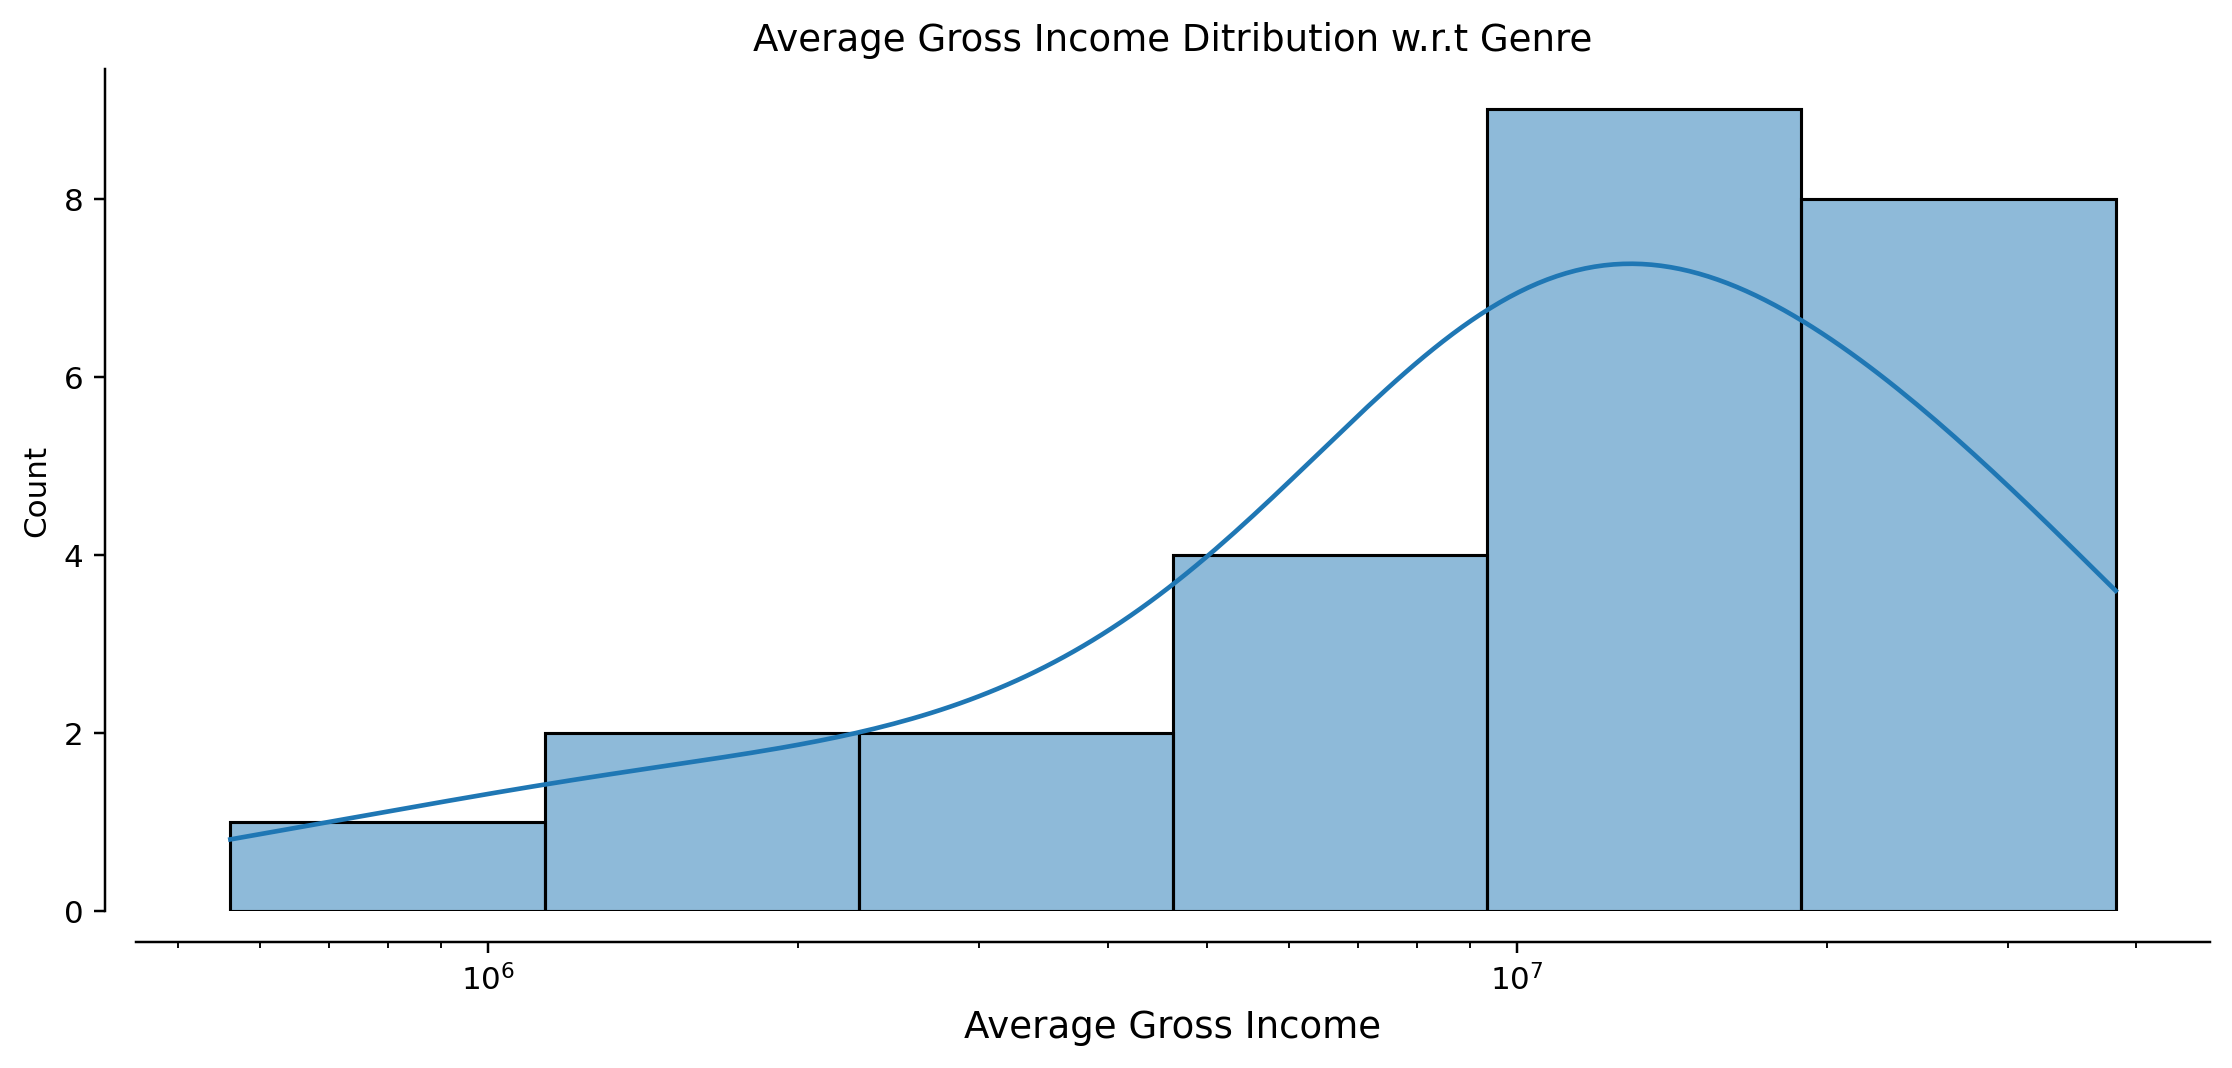

In [37]:
plt.figure(figsize=(12,5), dpi=223)
sn.histplot(data = Genres,
            x = 'Avg_gross_income',
            #bins = 26,
            stat = 'count',
            kde = True,
            log_scale=10,
           )

# Remove boundry line,set offset at corner & trim the corner
sn.despine(offset=10, trim= False)                            

plt.xlabel("Average Gross Income", fontsize = 12)                            # Set X label         
plt.title("Average Gross Income Ditribution w.r.t Genre", fontsize = 12)     # Set title
plt.show()

In [38]:
fig =px.histogram(Genres,
                x= 'Genre',
                y= 'Avg_gross_income',
                labels={'name':'Genre'},
                #size='Avg_gross_income',
                color = 'Genre',
                color_discrete_sequence = px.colors.sequential.Darkmint,
                template='plotly_dark',
                title='<b> Average Gross Income Distribution w.r.t Genre')

fig.update_layout(autosize=True,
                  xaxis=dict(showgrid=False),
                  yaxis=dict(showgrid=False)
                 )

fig.show()
pyo.plot(fig, filename = "Plotly/Average Gross Income Distribution w.r.t Genre.html", auto_open = True)

'Plotly/Average Gross Income Distribution w.r.t Genre.html'

### 10. Which two pairs of Genre is having maximum number of movies?

In [39]:
df = imdb.groupby('genre', as_index=False).count().rename(columns = {'name':"Movie's Count"})[['genre',"Movie's Count"]]
df.head()

genre  Movie's Count
0                        Action            118
1             Action, Adventure             49
2  Action, Adventure, Biography             15
3     Action, Adventure, Comedy            362
4      Action, Adventure, Crime            121

In [40]:
Genre_Pairs = {}
# Add the movie count of genre 2 pairs to Genre_Pairs
for i  in range(df.shape[0]):
    l = df['genre'][i].replace(',',' ').split()
    if len(l)==2:
        Genre_Pairs[df['genre'][i]] = df["Movie's Count"][i]
        #print(df['genre'][i],'-->',df["Movie's Count"][i])

# Create Dataframe from Genre_Pairs dictionary key and values
Genre_2Pairs = pd.DataFrame(list(zip(Genre_Pairs.keys(), Genre_Pairs.values())),columns =['Genre 2 Pairs','Movies_Counts'])

In [41]:
Genre_2Pairs.sort_values('Movies_Counts', ascending=False).head()

Genre 2 Pairs  Movies_Counts
58       Crime, Drama            466
94    Drama, Thriller            425
122  Horror, Thriller            328
39   Biography, Drama            272
95         Drama, War            269

* **`Crime & Drame` have the maximum movies counts of 466 movies.**

#### Top two Genre pairs Group w.r.t to Movies count

In [42]:
df = imdb.groupby('genre', as_index=False).count().rename(columns = {'name':"Movie's Count"})[['genre',"Movie's Count"]]
df.sort_values("Movie's Count", ascending=False).head(2)

genre  Movie's Count
43     Action, Crime, Drama            741
456  Crime, Drama, Thriller            527

#### Top two Genre w.r.t to Movies count

In [43]:
Genres.sort_values('Movies_Counts', ascending=False)[['Genre','Movies_Counts']].head(2)

Genre  Movies_Counts
12   Drama           9928
14  Action           5508